# Python implementation of the diabetes dataset
here all the models with highest accuracy are implemented


0.985524728588661


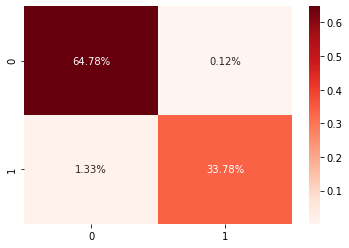

In [7]:
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

df1 = pd.read_csv('diabetes/diabetes.csv')
df2 = pd.read_csv('diabetes/new_diabetes.csv')
df=df1.append(df2)
df.drop_duplicates()
X = df.drop("Outcome", axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,random_state=50)

# Creating model object
model_dt = DecisionTreeClassifier( max_depth=16, random_state=40)
# Training Model
model_dt.fit(X_train,y_train)

# Making Prediction
pred_dt = model_dt.predict(X_test)
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Ensemble methods

In [26]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')
seed = 40
kfold = model_selection.KFold(n_splits=20, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = KNeighborsClassifier()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X,y, cv=kfold)
print(results.mean())

0.9483057032634763


ensemble model using voting classifier which combines logistic ,decision tree and knn algorithms
accuracy=91.07%

0.9107358262967431


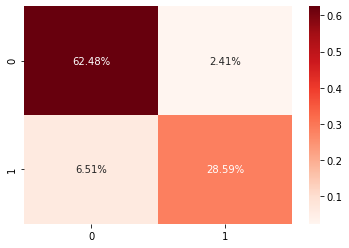

In [27]:
ensemble.fit(X_train,y_train)
pred_dt = ensemble.predict(X_test)
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [22]:
pred_ens = ensemble.predict([[11,143,94,33,146,36.6,0.254,51]])
pred_ens

array([1], dtype=int64)

Gradient Boosting Classification(an ensemble technique )
accuracy=88%

In [28]:
# Stochastic Gradient Boosting Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.8841913880604825


0.8817852834740652


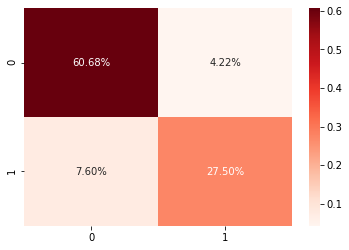

In [29]:
model.fit(X_train,y_train)
pred_dt = model.predict(X_test)
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')